In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('sample_data/california_housing_train.csv')

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


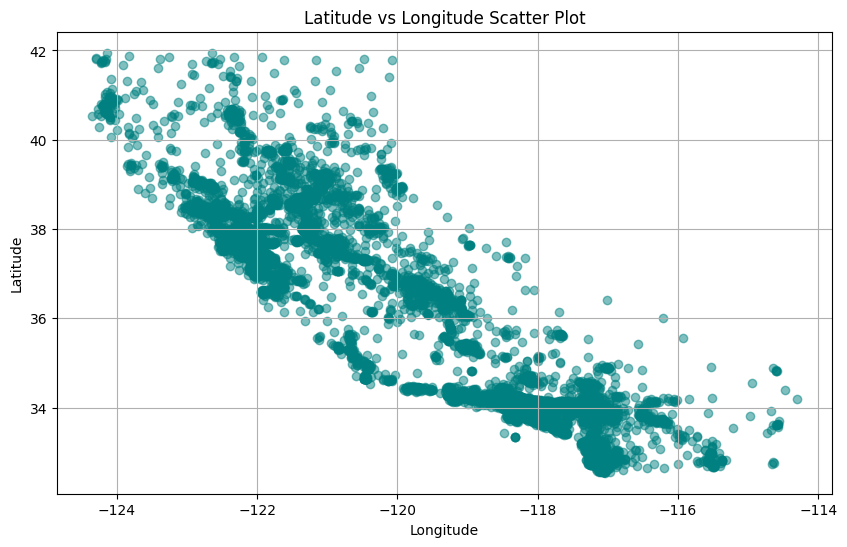

In [4]:
# Extract latitude and longitude columns
latitude = df['latitude']
longitude = df['longitude']

# Create a scatter plot with a decent color (teal)
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, alpha=0.5, marker='o', color='#008080')  # Teal color
plt.title('Latitude vs Longitude Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Extract latitude and longitude columns
coordinates = df[['latitude', 'longitude']]

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Apply DBSCAN algorithm
epsilon = 0.3  # Epsilon parameter for DBSCAN (adjust as needed)
min_samples = 10  # Minimum number of samples in a neighborhood (adjust as needed)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df['cluster'] = dbscan.fit_predict(coordinates_scaled)

In [7]:
# Print the cluster labels in a table format
cluster_table = df[['latitude', 'longitude', 'cluster']]
print("Data Points with Cluster Labels:")
print(cluster_table)

Data Points with Cluster Labels:
       latitude  longitude  cluster
0         34.19    -114.31        0
1         34.40    -114.47        0
2         33.69    -114.56        0
3         33.64    -114.57        0
4         33.57    -114.57        0
...         ...        ...      ...
16995     40.58    -124.26        0
16996     40.69    -124.27        0
16997     41.84    -124.30        0
16998     41.80    -124.30        0
16999     40.54    -124.35        0

[17000 rows x 3 columns]


In [8]:
# Count the number of data points in each cluster
cluster_counts = df['cluster'].value_counts()

# Print the cluster counts
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
 0    16984
-1       16
Name: cluster, dtype: int64


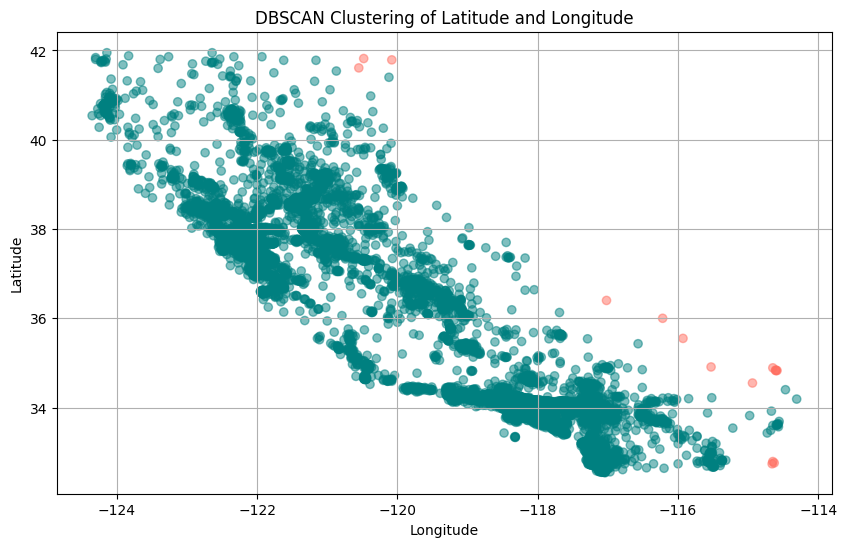

In [9]:
# Plot the clustered data with distinct and easily identifiable colors for different clusters
plt.figure(figsize=(10, 6))

# Assigning custom colors to clusters
cluster_colors = {0: '#008080', -1: '#FF6F61'}  # Add more colors if needed

plt.scatter(df['longitude'], df['latitude'], c=df['cluster'].map(cluster_colors), marker='o', alpha=0.5)
plt.title('DBSCAN Clustering of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [10]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df[['latitude', 'longitude']], df['cluster'])

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.35598756746661514


In [11]:
# Extract latitude and longitude columns
coordinates = df[['latitude', 'longitude']]

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Define parameter ranges and steps for grid search
epsilon_range =  np.linspace(0.01, 1, num=15)
min_samples_range = list(range(2, 30, 3))

# Initialize variables to store the best results
best_score = -1
best_epsilon = None
best_min_samples = None
best_clusters = None

# Initialize an empty list to store individual result DataFrames
result_dfs = []

# Perform grid search
for epsilon in epsilon_range:
    for min_samples in min_samples_range:
        # Apply DBSCAN algorithm
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        df['cluster'] = dbscan.fit_predict(coordinates_scaled)

        # Calculate silhouette score only if clusters are greater than 1 and less than 40
        num_clusters = len(df['cluster'].unique())
        if 1 < num_clusters < 40:
            silhouette_avg = silhouette_score(coordinates_scaled, df['cluster'])

            # Update best results if the current combination is better
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_epsilon = epsilon
                best_min_samples = min_samples
                best_clusters = df['cluster'].copy()

            # Store results in a temporary DataFrame
            result_df = pd.DataFrame({
                'Epsilon': [epsilon],
                'Min_Samples': [min_samples],
                'Num_Clusters': [num_clusters],
                'Silhouette_Score': [silhouette_avg]
            })

            # Append the temporary DataFrame to the list
            result_dfs.append(result_df)

# Concatenate all individual result DataFrames into the final results_df
results_df = pd.concat(result_dfs, ignore_index=True)

# Print the results table
print("Results of Grid Search:")
print(results_df)

Results of Grid Search:
     Epsilon  Min_Samples  Num_Clusters  Silhouette_Score
0   0.010000           23            39         -0.395594
1   0.010000           26            39         -0.425660
2   0.080714            5            26          0.225007
3   0.080714            8            25          0.182203
4   0.080714           11            15          0.186768
5   0.080714           14            13          0.223679
6   0.080714           17            13          0.335093
7   0.080714           20            15          0.337803
8   0.080714           23            15          0.145205
9   0.080714           26            16          0.139161
10  0.080714           29            17          0.133562
11  0.151429            2            15         -0.293443
12  0.151429            5             6         -0.042719
13  0.151429            8             7         -0.296888
14  0.151429           11             7         -0.294286
15  0.151429           14             5         

In [12]:
# After the loop completes
print(f"Total Clusters Formed for Best Combination: {best_clusters}")


Total Clusters Formed for Best Combination: 0       -1
1       -1
2       -1
3       -1
4       -1
        ..
16995    3
16996    3
16997   -1
16998   -1
16999    3
Name: cluster, Length: 17000, dtype: int64


In [13]:
# After the loop completes
best_cluster_counts = best_clusters.value_counts().sort_index()

print("Details of Points in Each Cluster for Best Combination:")
print(best_cluster_counts)


Details of Points in Each Cluster for Best Combination:
-1     278
 0      92
 1    9324
 2    7202
 3     104
Name: cluster, dtype: int64


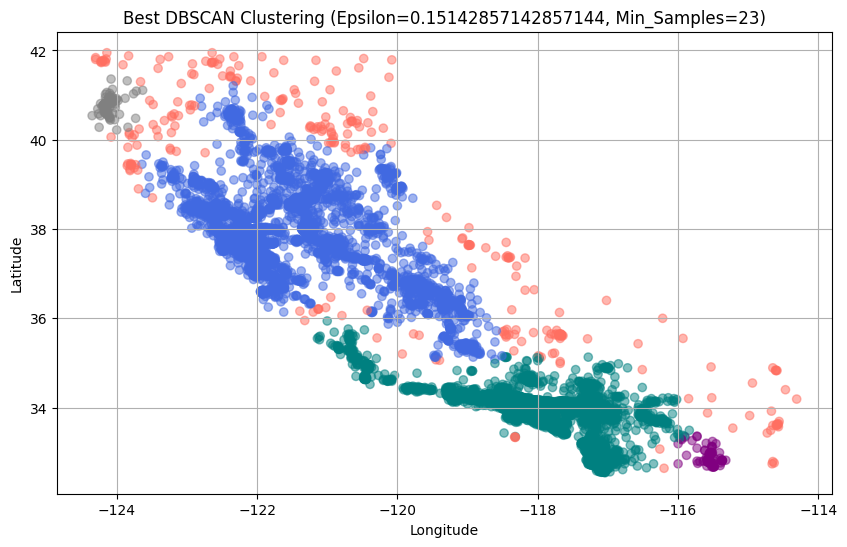

In [14]:
# Assigning custom colors to clusters
cluster_colors = {1: '#008080', -1: '#FF6F61',0:'#800080', 2:'#4169E1', 3:'#808080'}  # Add more colors if needed
# Plot the best clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=best_clusters.map(cluster_colors), marker='o', alpha=0.5)
plt.title(f'Best DBSCAN Clustering (Epsilon={best_epsilon}, Min_Samples={best_min_samples})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()



In [18]:
!pip install hdbscan scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039283 sha256=245bf9f6119c4d150eca26f54f49168b3d2c2c7def032e1084f2baaf8177d5c1
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


In [41]:
import hdbscan

california_df = df[['latitude', 'longitude']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(california_df[['latitude', 'longitude']])

# Range of min_cluster_size values
min_cluster_sizes = list(range(2, 10, 1))

# List to store results for each combination
results = []

# Perform HDBSCAN clustering for each min_cluster_size
for min_cluster_size in min_cluster_sizes:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, metric='haversine')
    cluster_labels = clusterer.fit_predict(scaled_data)

    # Skip if only noise points are present
    if len(set(cluster_labels)) == 1:
        silhouette_scores = -1
    else:
        silhouette_scores = silhouette_score(scaled_data, cluster_labels)

    # Store results
    results.append({
        'min_cluster_size': min_cluster_size,
        'silhouette_score': silhouette_scores,
        'cluster_labels': cluster_labels,
        'clusterer':clusterer
    })

# Print information for each combination
for result in results:
    print(f"min_cluster_size: {result['min_cluster_size']}, Silhouette Score: {result['silhouette_score']:.4f}")

# Find the min_cluster_size with the best silhouette score
best_result = max(results, key=lambda x: x['silhouette_score'])
best_min_cluster_size = best_result['min_cluster_size']


min_cluster_size: 2, Silhouette Score: 0.2277
min_cluster_size: 3, Silhouette Score: 0.0554
min_cluster_size: 4, Silhouette Score: 0.0110
min_cluster_size: 5, Silhouette Score: -0.0462
min_cluster_size: 6, Silhouette Score: -0.0676
min_cluster_size: 7, Silhouette Score: -0.0856
min_cluster_size: 8, Silhouette Score: 0.0626
min_cluster_size: 9, Silhouette Score: 0.0776


<ipython-input-42-3036a1ac9ba8>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  teal_complement_palette = plt.cm.get_cmap('tab10', num_clusters)


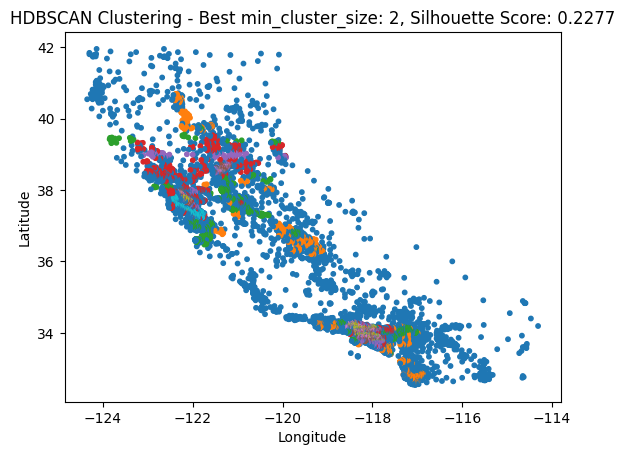

In [42]:
from matplotlib.colors import ListedColormap

# Determine the number of clusters
unique_labels = np.unique(best_result['cluster_labels'])
num_clusters = len(unique_labels)

# Generate a color palette with num_clusters colors that go well with teal
teal_complement_palette = plt.cm.get_cmap('tab10', num_clusters)

# Visualize the cluster with the best silhouette score using the dynamically generated palette
plt.scatter(california_df['longitude'], california_df['latitude'], c=best_result['cluster_labels'], cmap=teal_complement_palette, s=10)
plt.title(f'HDBSCAN Clustering - Best min_cluster_size: {best_min_cluster_size}, Silhouette Score: {best_result["silhouette_score"]:.4f}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
